In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AAPL.csv')

In [5]:
df.shape

(2011, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [8]:
df.isnull().sum().sum()/len(df)

np.float64(0.0)

In [44]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [45]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [15]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True , errors = 'coerce')
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


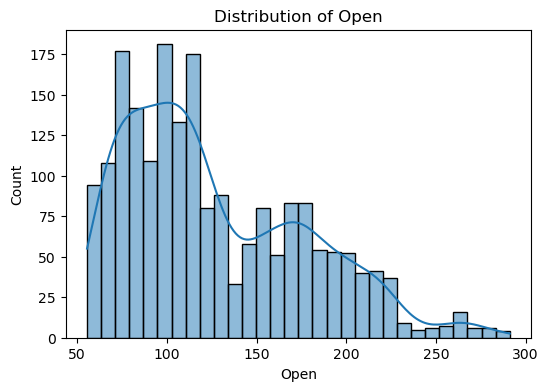

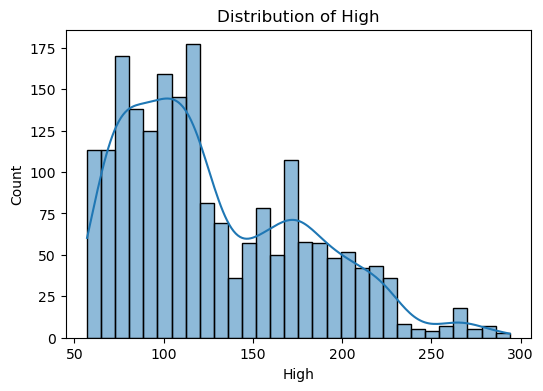

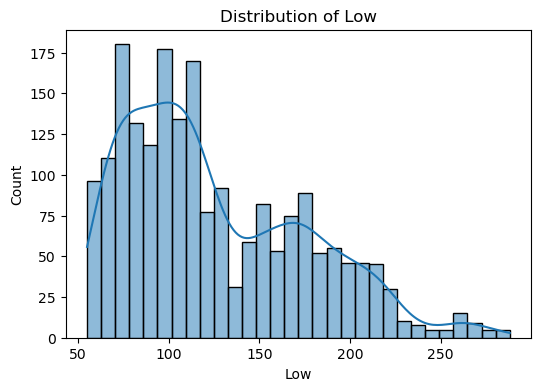

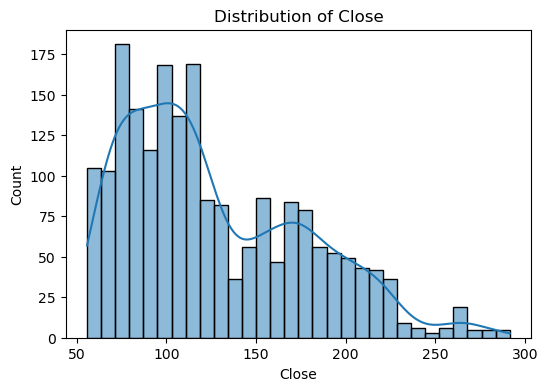

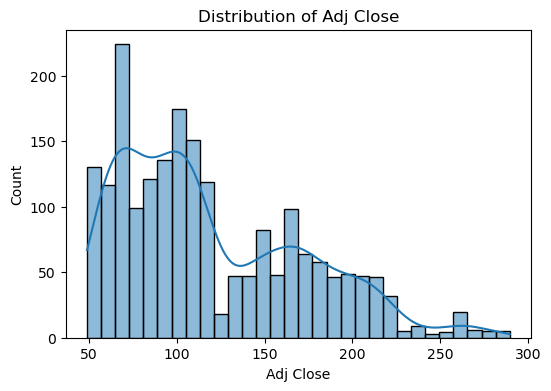

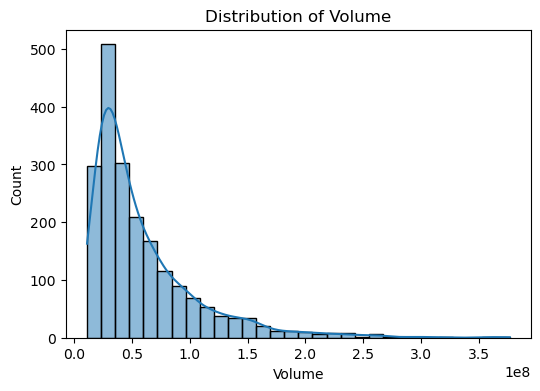

In [24]:
for col in ['Open' , 'High' , 'Low' , 'Close' , 'Adj Close' , 'Volume']:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col] , kde = True , bins = 30)
    plt.title(f'Distribution of {col}')
    plt.show()

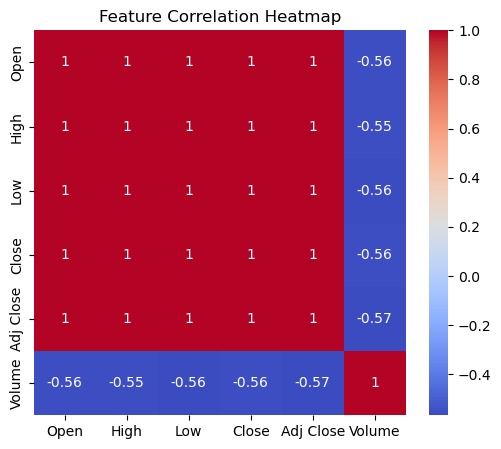

In [26]:
plt.figure(figsize = (6,5))
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

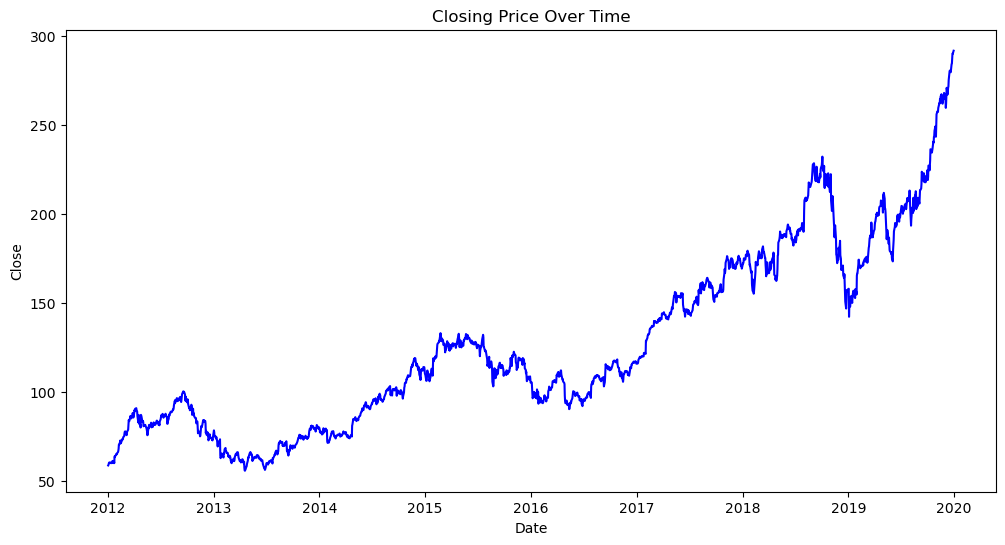

In [28]:
plt.figure(figsize = (12, 6))
plt.plot(df['Close'] , label = 'Close Price' , color = 'Blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

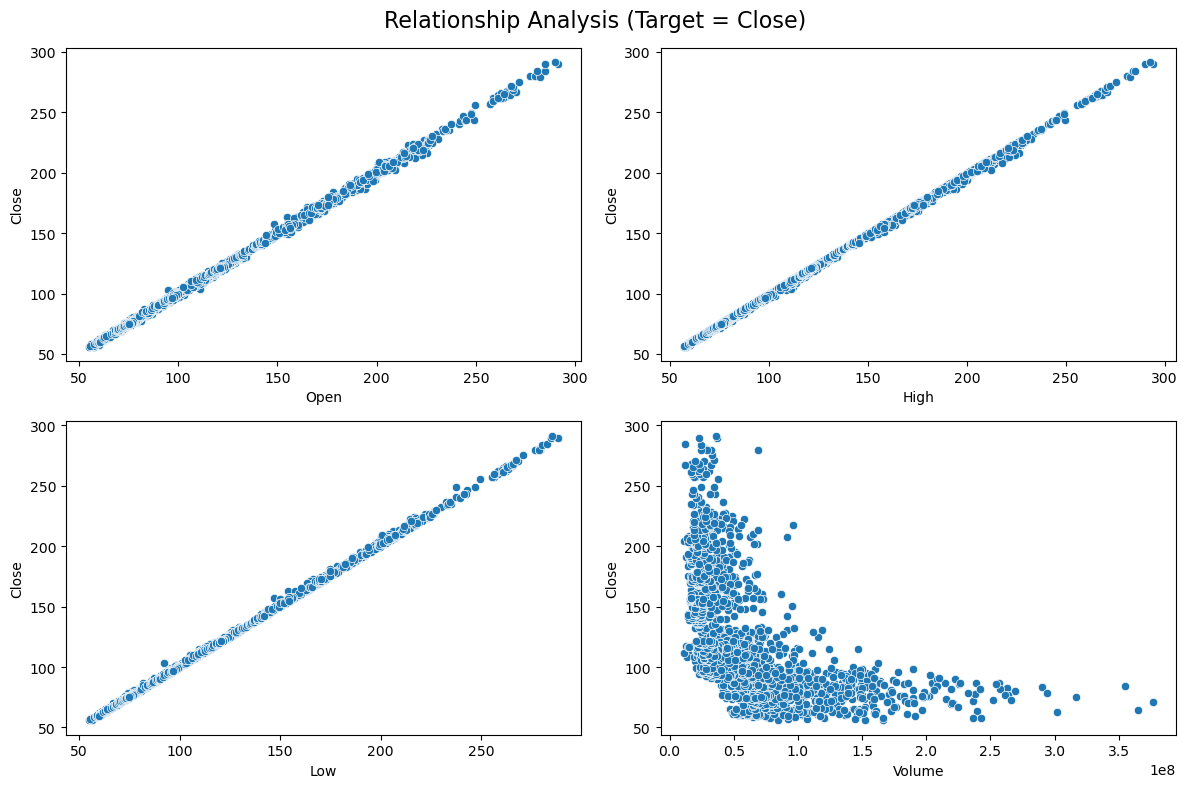

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
plt.suptitle('Relationship Analysis (Target = Close)', fontsize = 16)
sns.scatterplot(x='Open', y='Close', data=df, ax=axes[0,0])
sns.scatterplot(x='High', y='Close', data=df, ax=axes[0,1])
sns.scatterplot(x='Low', y='Close', data=df, ax=axes[1,0])
sns.scatterplot(x='Volume', y='Close', data=df, ax=axes[1,1])
plt.tight_layout()
plt.show()

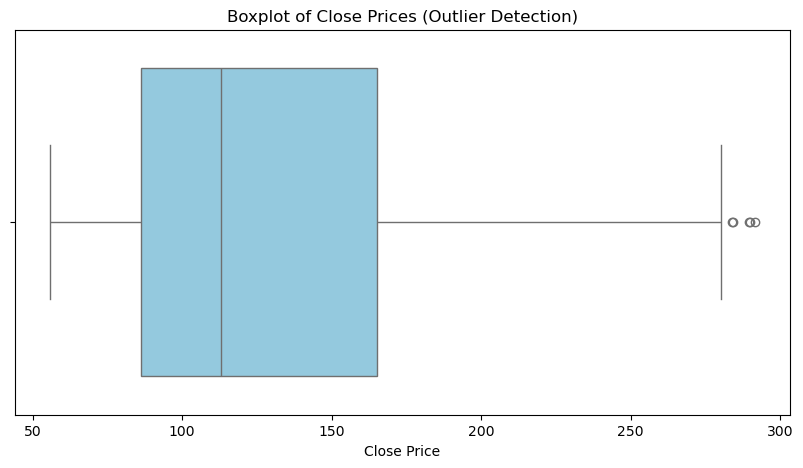

In [42]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['Close'] , color = 'skyblue')
plt.title('Boxplot of Close Prices (Outlier Detection)')
plt.xlabel('Close Price')
plt.show()

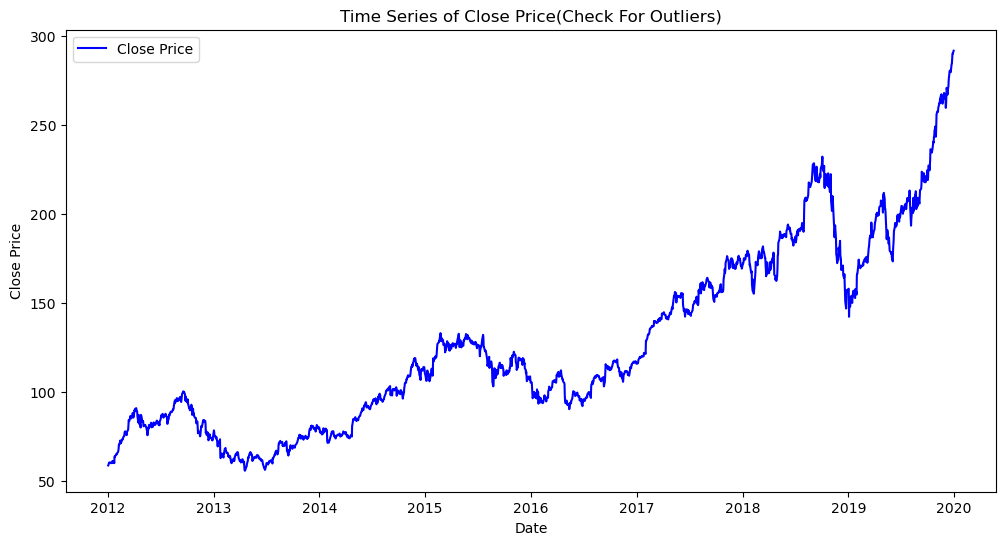

In [43]:
plt.figure(figsize = (12,6))
plt.plot(df.index , df['Close'] , label = 'Close Price' , color = 'Blue')
plt.title('Time Series of Close Price(Check For Outliers)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

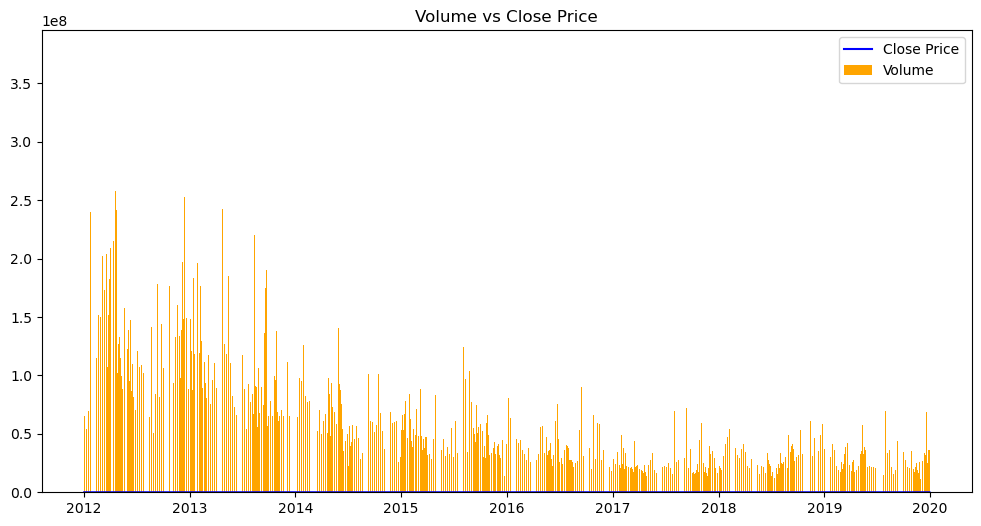

In [41]:
plt.figure(figsize = (12,6))
plt.bar(df.index , df['Volume'] , color = 'orange' , label = 'Volume')
plt.plot(df['Close'] , color = 'blue' , label = 'Close Price')
plt.legend()
plt.title('Volume vs Close Price')
plt.show()

In [ ]:
# df.to_csv('cleaned_dataset.csv' , index = True)